<a href="https://colab.research.google.com/github/Anubhav1107/First_One/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import torch
from torchvision import datasets, transforms
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
import helper
from torch import optim,nn
import torchvision
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt


--2020-02-02 23:06:44--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [25]:
#Data part after collection of data
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#!ls = '/content/drive/My Drive//image/'
!ls= 'gdrive/My Drive/Data classification/image/train'
#root_path

/bin/bash: gdrive/My Drive/Data classification/image/train: Is a directory


In [0]:
#Transform and loading the data
train_transformer = transforms.Compose([transforms.RandomRotation(30),
                                      transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])
                                       ])
                                      

test_transformer = transforms.Compose([transforms.Resize(225),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])]) 

train_dir = '/content/gdrive/My Drive/Data classification/image'
test_dir = '/content/gdrive/My Drive/Data classification/image/test'

In [0]:
#loading the dataset
traindata = datasets.ImageFolder(train_dir, transform = train_transformer)
testdata = datasets.ImageFolder(test_dir, transform = test_transformer )

#loading the data loader
trainloader = torch.utils.data.DataLoader(traindata, batch_size = 5, shuffle = True)
testloader = torch.utils.data.DataLoader(testdata,batch_size = 5, shuffle =True)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


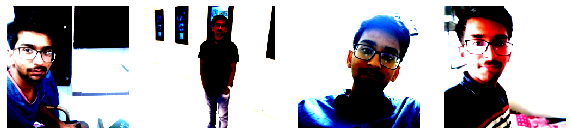

In [53]:
data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)